# Applied Statistical Analysis CIE-3

### My Dataset
Games on Google Play Store
This is a dataset of top 100 games of each category of games on Google Play Store along with their ratings and other data like price and number of installs.

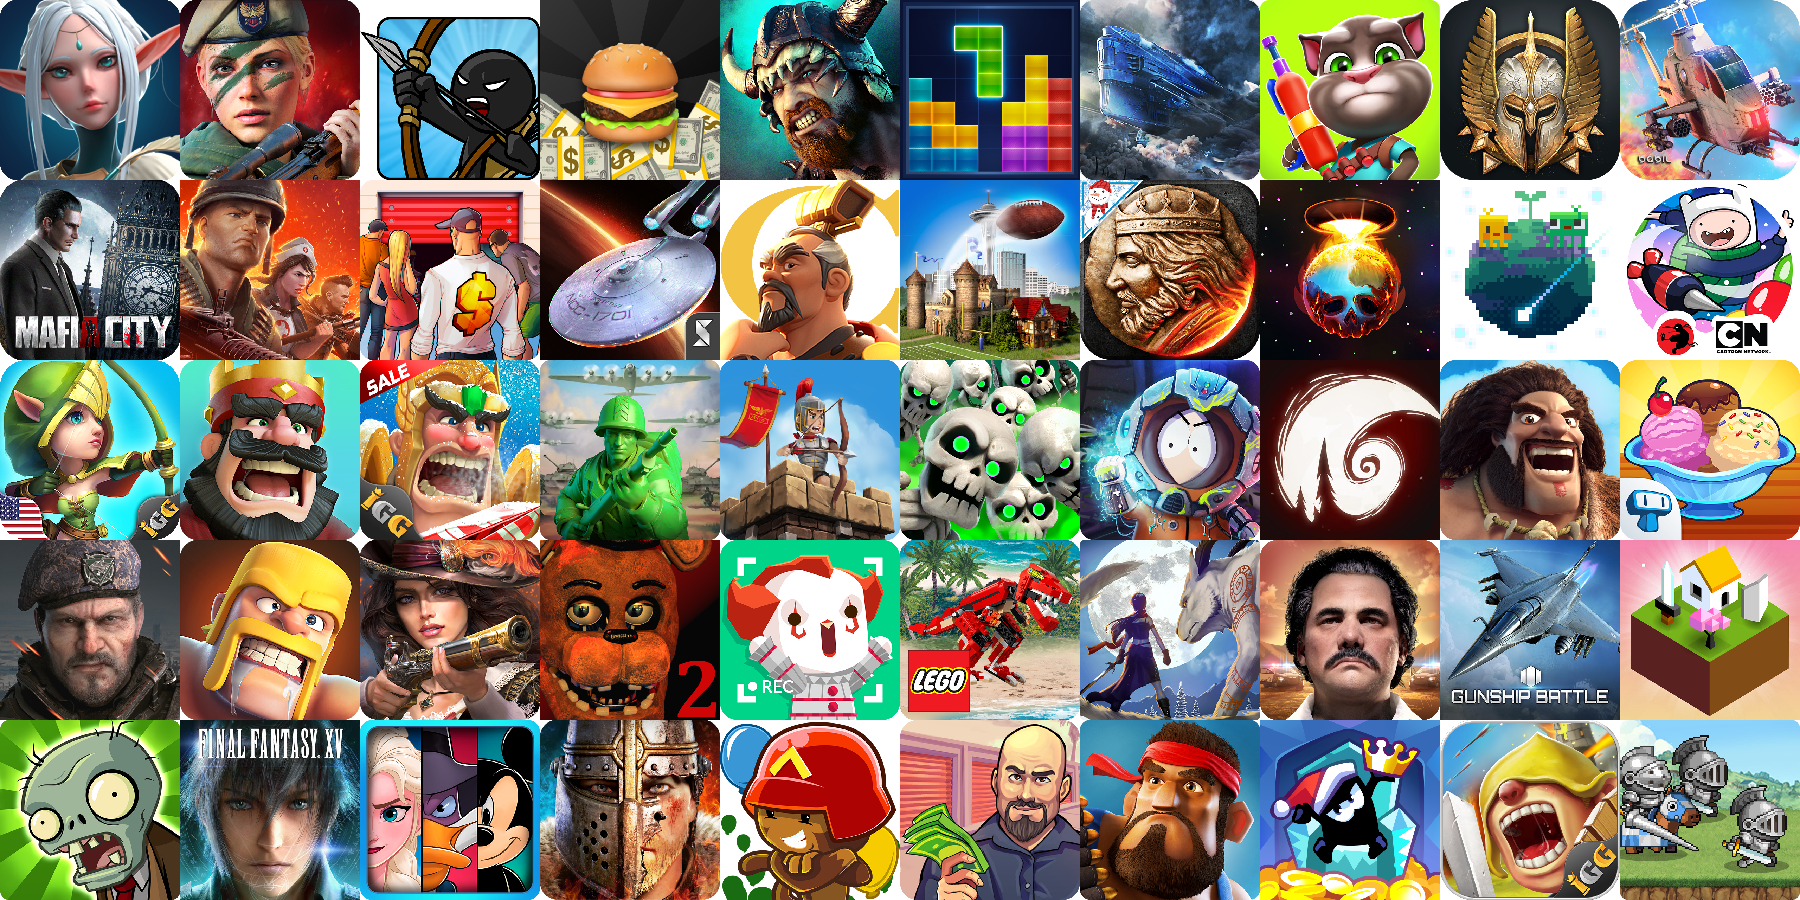

In [154]:
from IPython.display import Image
Image(filename='games.png',width=800, height=400)

### My Research Questions

#### 1.Which game category has the highest no of downloads?

##### Importing the dataset

In [155]:
import numpy
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [156]:
games = pd.read_csv('android-games.csv', low_memory=False)

#### Let us take a glance of how the dataset looks

In [157]:
games.head()

rank                                         title  total ratings installs  \
0     1                  Garena Free Fire - The Cobra       80678661  500.0 M   
1     2                   PUBG MOBILE: Graffiti Prank       35971961  100.0 M   
2     3                     Mobile Legends: Bang Bang       25836869  100.0 M   
3     4                                   Brawl Stars       17181659  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554  100.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0            4.33               2.9               7.9    0.0  GAME ACTION   
1            4.24               2.0               3.1    0.0  GAME ACTION   
2            4.08               1.6               3.3    0.0  GAME ACTION   
3            4.27               4.1               6.6    0.0  GAME ACTION   
4            4.33               0.8               1.8    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   
2        17850942         1796761         1066095          725429   
3        12493668         1474319          741410          383478   
4         9657878         2124544         1034025          375159   

   1 star ratings   paid  
0         9654037  False  
1         4945478  False  
2         4397640  False  
3         2088781  False  
4         1045945  False

#### To find out the dimensions of our dataset, we can use the shape function

In [158]:
games.shape

(1730, 15)

#### This means we have 1730 rows and 15 columns in our dataset. Since we are not doing Analytics using Natural Language Processing,  the game title is of no use to us.
#### For our reference, let us find out the datatype of the columns

In [159]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
rank                1730 non-null int64
title               1730 non-null object
total ratings       1730 non-null int64
installs            1730 non-null object
average rating      1730 non-null float64
growth (30 days)    1730 non-null float64
growth (60 days)    1730 non-null float64
price               1730 non-null float64
category            1730 non-null object
5 star ratings      1730 non-null int64
4 star ratings      1730 non-null int64
3 star ratings      1730 non-null int64
2 star ratings      1730 non-null int64
1 star ratings      1730 non-null int64
paid                1730 non-null bool
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


#### From the above output, we can see that the dimension of each column is equal and all columns are non-null and also the datatypes are now known to us. If we want to check the number of null values in each column, we can use the following command

In [160]:
games.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

#### Now that we have understood the dataset, we can move on to doing Data Analytics on  our Data set

### EDA on Android games

#### Let us find out the number of paid games.

In [161]:
games[games['paid']==True] #selecting all rows in games, which are paid 

rank                  title  total ratings installs  average rating  \
91      92          Hitman Sniper         848831   10.0 M            4.41   
153     54               Terraria         317546    1.0 M            4.65   
211     12              Minecraft        3999232   10.0 M            4.54   
261     62          Geometry Dash         767518    1.0 M            4.62   
477     64                 Reigns         146504  500.0 k            4.58   
869     46               Cytus II         109687    1.0 M            4.59   
1588    65  Trivia Crack (No Ads)          74594  500.0 k            4.58   

      growth (30 days)  growth (60 days)  price        category  \
91                 0.3               0.8   0.99     GAME ACTION   
153                1.0               2.3   4.99  GAME ADVENTURE   
211                1.4               2.8   7.49     GAME ARCADE   
261                0.6               1.2   1.99     GAME ARCADE   
477                0.1               0.2   2.99       GAME CARD   
869                1.0               2.2   1.99      GAME MUSIC   
1588               0.9               2.2   1.99     GAME TRIVIA   

      5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
91            607502          115334           48040           19224   
153           264563           24837           10184            4387   
211          3214765          312995          138682           70661   
261           623950           73997           25169            9705   
477           108627           25330            5696            2743   
869            86420           12246            4534            1999   
1588           55411           12625            3123            1117   

      1 star ratings  paid  
91             58729  True  
153            13572  True  
211           262126  True  
261            34694  True  
477             4105  True  
869             4484  True  
1588            2315  True

#### As we can see, there are a total of 7 paid games. This means there is a majority of free games

In [162]:
games['category'].value_counts()

GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME EDUCATIONAL     100
GAME ADVENTURE       100
GAME TRIVIA          100
GAME MUSIC           100
GAME RACING          100
GAME ARCADE          100
GAME SIMULATION      100
GAME SPORTS          100
GAME STRATEGY        100
GAME ACTION          100
GAME BOARD           100
GAME CASINO          100
GAME PUZZLE          100
GAME ROLE PLAYING    100
Name: category, dtype: int64

In [163]:
games['installs'].value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
100.0 k       2
1000.0 M      2
Name: installs, dtype: int64

#### In the above table, we can see that the installs are of object type. To conitnue with our analysis we must convert it to numerical type. We can do this by using the map function of the numoy library with will allow us to add a numerical column and map it according to the present data.

In [164]:
number_of_downloads = {'100.0 k' : 100000, '500.0 k' : 500000, '1.0 M' : 1000000, '5.0 M' : 5000000, '10.0 M' :10000000, '50.0 M' : 50000000, '100.0 M': 100000000,'500.0 M': 500000000, '1000.0 M': 1000000000,}
games['number_of_downloads'] = games['installs'].map(number_of_downloads)

#### Now let us see if our Dataset has the updated columns

In [165]:
games.head(1)

rank                         title  total ratings installs  average rating  \
0     1  Garena Free Fire - The Cobra       80678661  500.0 M            4.33   

   growth (30 days)  growth (60 days)  price     category  5 star ratings  \
0               2.9               7.9    0.0  GAME ACTION        61935712   

   4 star ratings  3 star ratings  2 star ratings  1 star ratings   paid  \
0         4478738         2795172         1814999         9654037  False   

   number_of_downloads  
0            500000000

#### Now that we have converted our column to  numerical type, we have completed the data manipulation section of our analysis, we can now find the answer to our Research Question

In [166]:
rq1=games.groupby(by='category')['number_of_downloads'].sum() #gets the total number of downloads per category

In [167]:
rq1.head(2)

category
GAME ACTION       6650000000
GAME ADVENTURE    1888000000
Name: number_of_downloads, dtype: int64

#### Let's sort our data according to number of downloads

In [168]:
rq1 = rq1.reset_index()
rq1 = rq1.sort_values(by= 'number_of_downloads')

In [169]:
rq1.head()

category  number_of_downloads
15  GAME TRIVIA            704100000
5   GAME CASINO            788500000
8    GAME MUSIC           1285600000
16    GAME WORD           1385000000
4     GAME CARD           1401000000

#### Now let us analyse the data using a barplot and find out the game category with the most installed number of games

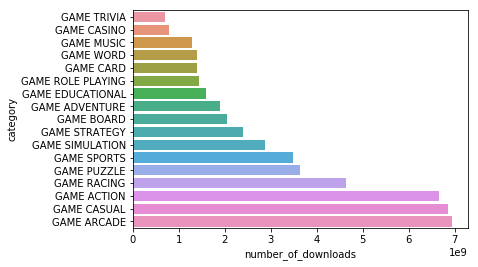

In [170]:
sns.barplot(y='category',x='number_of_downloads', data=rq1)

#### According to our plot, we can conclude that the Casual, Arcade, and Action based games are the most download category 
#### Trivia and casino are the least downloaded games

#### 2.With respect to downloads and average ratings, which category holds the most number of popular games?

#### Let us sort the dataset on the basis of its average ratings and the number of downloads

In [171]:
rq2 = games.sort_values(by= ['number_of_downloads', 'average rating'], ascending = False).head(200)


#### After the above step we group our data according to each category, and get the count of reviews and again sort them by the number of downloads

In [172]:
rq2=rq2.groupby(by='category')['number_of_downloads'].count().reset_index().sort_values(by='number_of_downloads', ascending=False)

#### Now all we need to do, is plot this using any plot to find out the most played game category now with a different filter

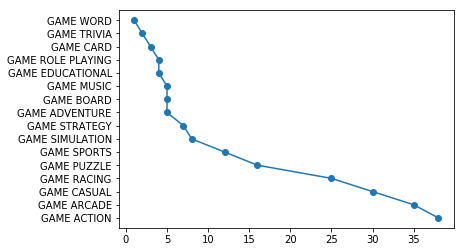

In [173]:
rq2 = games.sort_values(by = ['number_of_downloads','average rating'], ascending=False).head(200)
rq2=rq2.groupby(by = 'category')['number_of_downloads'].count().reset_index().sort_values(by = 'number_of_downloads', ascending=False)
plot.scatter(rq2['number_of_downloads'], rq2['category'])
plot.plot(rq2['number_of_downloads'], rq2['category'])

#### As we can see our result is not the same as it was before, now the most downloaded game belongs to the action category.

#### 3.What are the average ratings of games in free vs paid games?

#### To find the average ratings of free games vs paid games, we must find the mean(average) of either types of games and compare them

In [174]:
rq3free=games[(games['paid']==False)]
rq3paid=games[(games['paid']==True)]

In [175]:
freemean=rq3free['average rating'].mean()
paidmean=rq3paid['average rating'].mean()
print("The Average rating of free games are :",round(freemean,2))
print("The Average rating of paid games are :",round(paidmean,2))

The Average rating of free games are : 4.31
The Average rating of paid games are : 4.57


#### From  the above results we can conclude that the paid ames, although being less in number, have a better average rating than free games

#### 4.Which category of games has grown the most in the last 60 days? Is it similar to its progress in 30 days?

In [178]:
rq430days = games.groupby(by = 'category')['growth (30 days)'].mean()
rq460days = games.groupby(by = 'category')['growth (60 days)'].mean()

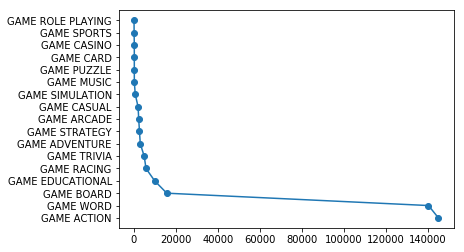

In [194]:
rq4 = games.sort_values(by = 'growth (30 days)', ascending=False).head(200)
rq4=rq4.groupby(by = 'category')['growth (30 days)'].sum().reset_index().sort_values(by = 'growth (30 days)', ascending=False)
plot.scatter(rq4['growth (30 days)'], rq4['category'])
plot.plot(rq4['growth (30 days)'], rq4['category'])

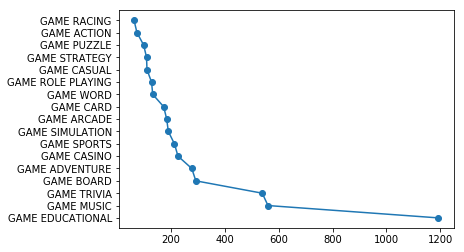

In [191]:
rq4 = games.sort_values(by = 'growth (60 days)', ascending=False).head(200)
rq4=rq4.groupby(by = 'category')['growth (60 days)'].sum().reset_index().sort_values(by = 'growth (60 days)', ascending=False)
plot.scatter(rq4['growth (60 days)'], rq4['category'])
plot.plot(rq4['growth (60 days)'], rq4['category'])

#### On analysing the above graphs we can see that not all games that have the same growth rate as it did during the first 30 days. We can see the in the first 30 days Action Category had the maximum growth rate whereas in the first 60 days, educational category of games had the maximum growth